In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Cardiotocographic.csv")
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [6]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [28]:
for i in df.columns:
    if df[i].dtype in ["float64","int64"]:
        df[i] = df[i].fillna(df[i].mean())

In [29]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.6 KB


In [33]:
"""All the values are Numeric Data type we can't change any one"""

"All the values are Numeric Data type we can't change any one"

In [47]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = df[col].mean()

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}:\n", outliers[[col]])

Outliers in LB:
               LB
134    52.000000
411   214.000000
610   214.000000
612   214.000000
785    52.000000
1027   51.842487
1103  214.000000
1406  214.000000
1504  214.000000
1834   52.188547
Outliers in AC:
             AC
8     0.038567
23   -0.019284
83    0.014706
85    0.014230
116   0.038567
157  -0.019284
181   0.017241
496   0.014178
497   0.015552
498   0.015258
500   0.014178
501   0.014726
526   0.015013
527   0.014065
529   0.019284
530   0.015590
531   0.016423
552   0.015782
616   0.014806
626   0.038567
630   0.017391
681  -0.019284
999   0.014024
1000  0.014907
1066  0.014303
1093  0.015642
1094  0.017668
1096  0.017341
1231  0.038567
1248  0.017857
1311  0.014320
1312  0.015113
1687  0.014400
1752 -0.019284
1857  0.014068
1858  0.015907
1859  0.017073
1860  0.015166
1861  0.014444
1862  0.016000
1866  0.014842
1918  0.038567
2060  0.038567
Outliers in FM:
             FM
12    0.072335
13    0.222390
14    0.407840
15    0.380223
16    0.441400
...        .

In [58]:
df[col] = df[col].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)


In [59]:
if not outliers.empty:
        print(f"Outliers detected in column '{col}':")
        print(outliers[[col]])
else:
    print(f"No outliers detected in column '{col}'.")

Outliers detected in column 'NSP':
           NSP
6    -1.025988
49    0.996714
57    0.997757
120   0.997921
210   0.997966
232   0.983420
381  -1.000000
382  -1.000000
394   0.994184
501   0.975440
520   0.992234
532   0.997688
594   0.981226
612   0.991200
681   0.984834
714   0.992847
760   0.995974
788   0.979738
856   0.991675
858   0.988393
875   0.987498
914   0.993796
924   0.989006
938   0.996348
992   0.991066
1073 -1.000000
1160  0.981460
1252  0.995916
1286  0.972305
1304  0.967075
1313  0.984792
1356  0.999865
1383 -1.000000
1401  0.989525
1425  0.978174
1507  0.969447
1517  0.979280
1625  0.997479
1646 -1.000000
1700  0.989257
1725  0.996631
1804  0.988399
1848  0.996614
1925  0.997939
1991  0.994432
2057  0.999724
2059  0.993917
2081  0.998300
2082  0.993695
2109  0.989862


(array([  50.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2076.]),
 array([0.99999675, 0.99999708, 0.9999974 , 0.99999773, 0.99999805,
        0.99999838, 0.9999987 , 0.99999903, 0.99999935, 0.99999968,
        1.        ]),
 <BarContainer object of 10 artists>)

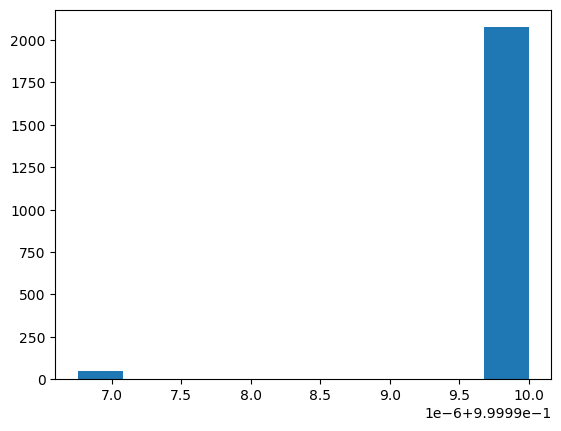

In [65]:
data = df["NSP"]
plt.hist(data)


In [74]:
summary = {}

# Loop through each column
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    summary[col] = {
        'Mean': df[col].mean(),
        'Median': df[col].median(),
        'Standard Deviation': df[col].std(),
        'IQR': df[col].quantile(0.75) - df[col].quantile(0.25)
    }

# Convert to DataFrame for better display
summary_df = pd.DataFrame(summary).T
print(summary_df)

                Mean      Median  Standard Deviation        IQR
LB        133.343598  133.000000        1.121433e+01  14.000000
AC          0.003219    0.001668        4.370061e-03   0.005606
FM          0.009894    0.000000        6.753968e-02   0.002567
UC          0.004391    0.004484        3.340462e-03   0.004685
DL          0.001895    0.000000        3.342682e-03   0.003289
DS          0.000003    0.000000        1.408344e-04   0.000000
DP          0.000175    0.000000        8.356116e-04   0.000000
ASTV       46.995984   49.000000        1.881397e+01  29.000000
MSTV        1.364378    1.200000        1.173632e+00   1.000000
ALTV       10.285964    0.000000        2.120504e+01  11.000000
MLTV        8.284887    7.500000        7.734356e+00   6.200000
Width      70.429260   68.000000        4.271916e+01  63.000000
Tendency    0.316371    0.000000        6.424238e-01   1.000000
NSP         1.000000    1.000000        4.919574e-07   0.000000


In [76]:
"""1.Highly Skewed Features
- In ALTV (Mean: 10.29, Median: 0.00): Strong right skew suggests most values are low, but a few are extremely high.
- FM ,DL , DP,DS: All have medians of 0, indicating sparse or zero-heavy distributions. These may benefit from log transformation or binarization in modeling.

2.Constant or Near-Constant Feature
-NSP has a mean and median of 1.0 with an almost-zero standard deviation, implying it's a constant feature. This could be a label or a non-informative variable for modeling.

3.High Variability
- Width(Std Dev: 42.72, IQR: 63): Very wide spread, suggesting diverse values. This could dominate models if not scaled.
- ASTV and ALTV also show high standard deviations and IQRs, indicating significant variability.

4. mmetric Distributions
- UC (Mean,Median): Indicates a relatively symmetric distribution, which is often easier to model.
5.Potential Outliers
- Features like ALTV, Width, and ASTV show large gaps between mean and median, hinting at outliers or long-tailed distributions.

6.Low-Value Features
- DS,DP,DL,AC: Extremely small means and standard deviations suggest these features might be negligible or need normalization.
"""

"1.Highly Skewed Features\n- In ALTV (Mean: 10.29, Median: 0.00): Strong right skew suggests most values are low, but a few are extremely high.\n- FM ,DL , DP,DS: All have medians of 0, indicating sparse or zero-heavy distributions. These may benefit from log transformation or binarization in modeling.\n\n2.Constant or Near-Constant Feature\n-NSP has a mean and median of 1.0 with an almost-zero standard deviation, implying it's a constant feature. This could be a label or a non-informative variable for modeling.\n\n3.High Variability\n- Width(Std Dev: 42.72, IQR: 63): Very wide spread, suggesting diverse values. This could dominate models if not scaled.\n- ASTV and ALTV also show high standard deviations and IQRs, indicating significant variability.\n\n4. mmetric Distributions\n- UC (Mean,Median): Indicates a relatively symmetric distribution, which is often easier to model.\n5.Potential Outliers\n- Features like ALTV, Width, and ASTV show large gaps between mean and median, hinting at

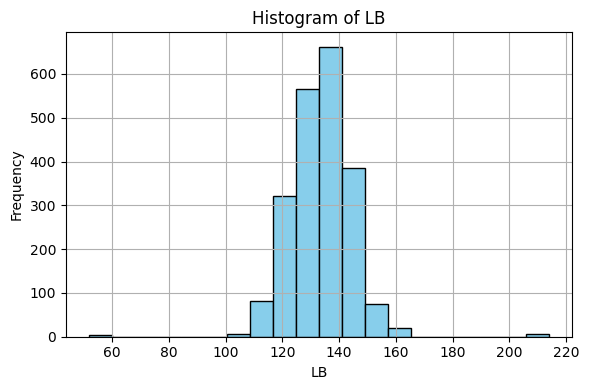

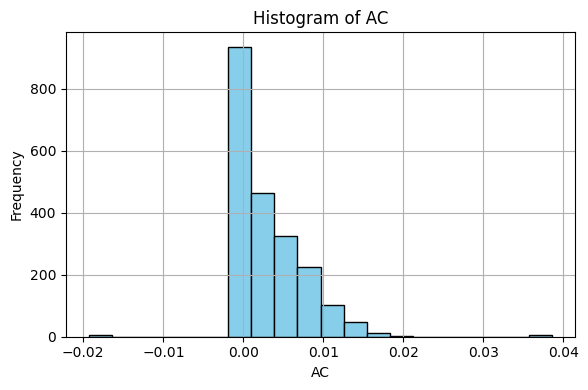

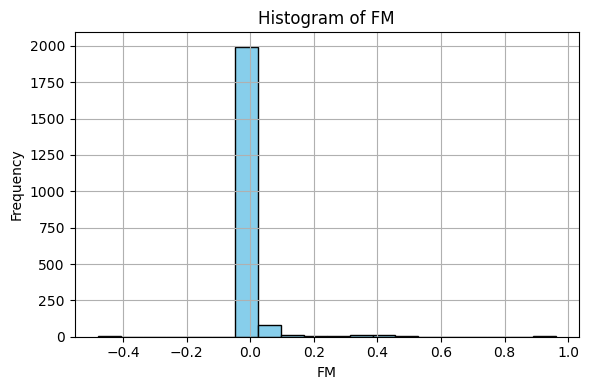

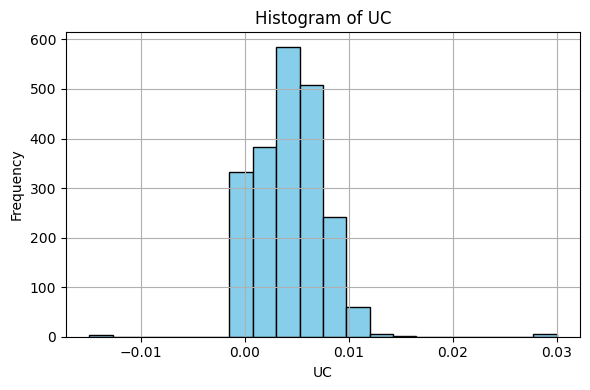

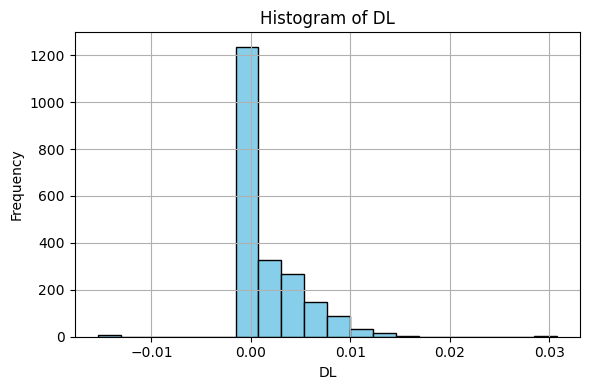

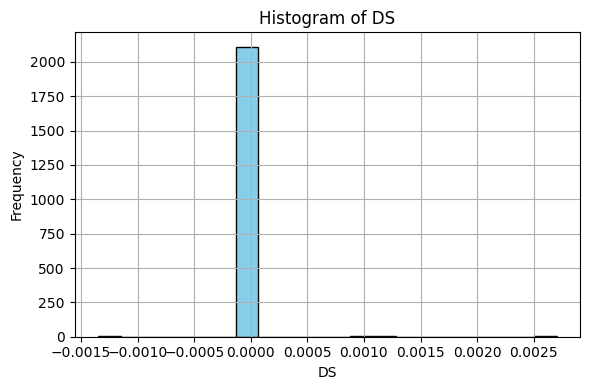

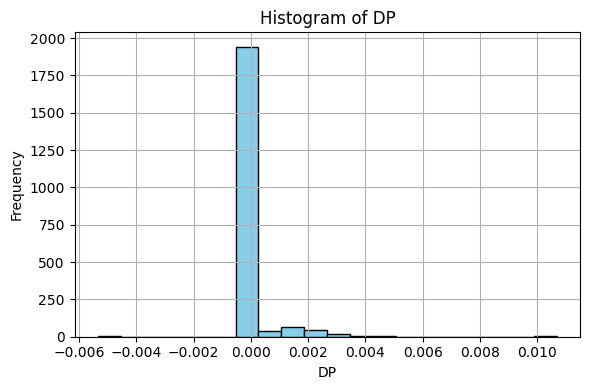

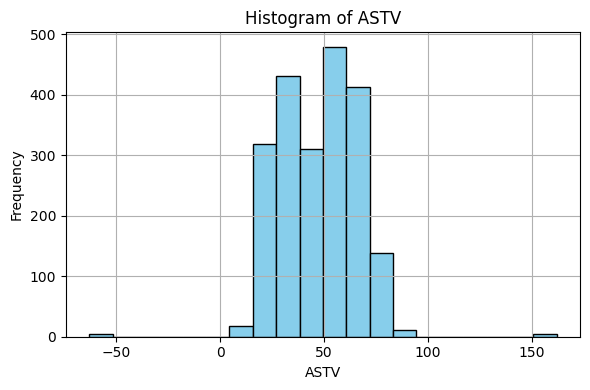

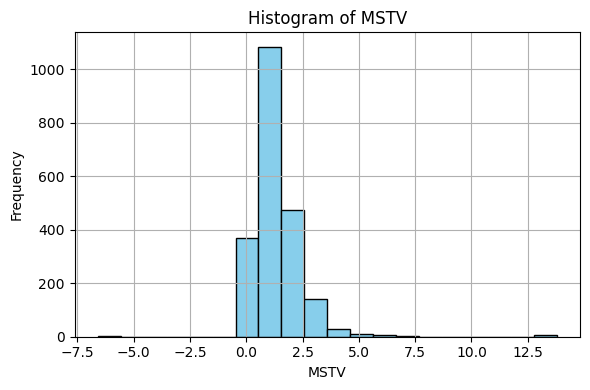

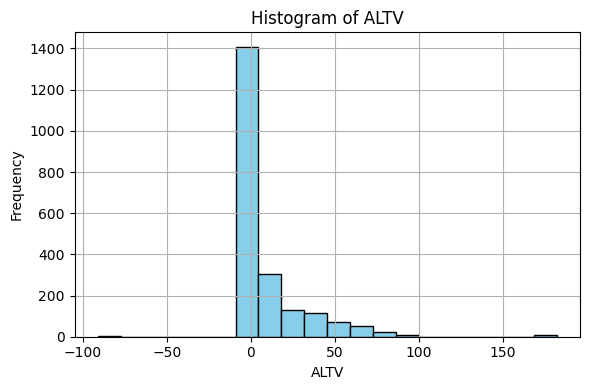

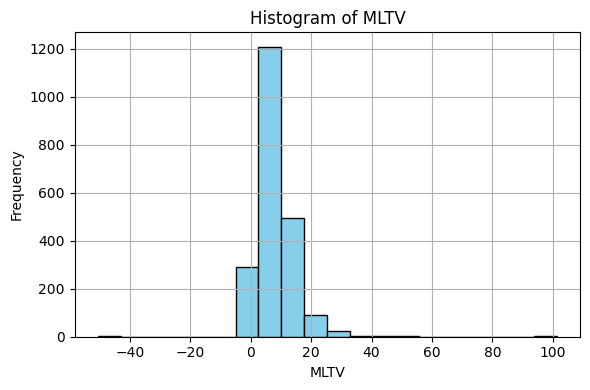

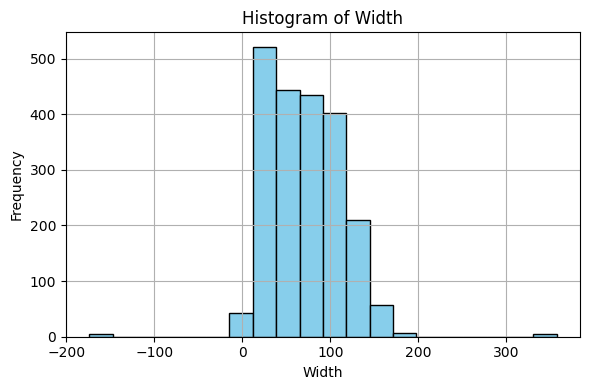

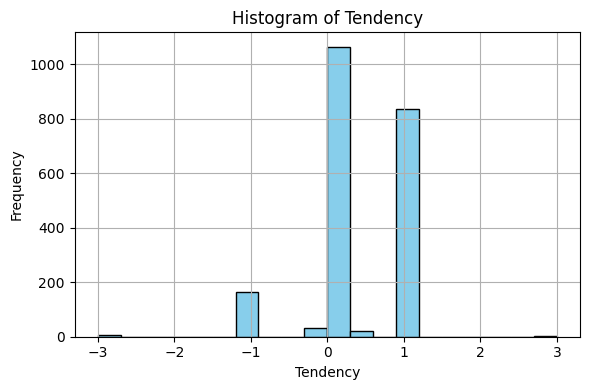

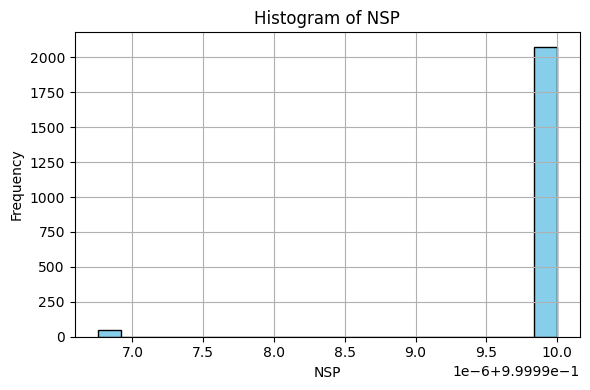

In [82]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [84]:
""" There is no such categorical columns, so we can not perform barcharts or pie charts on this file
"""

' There is no such categorical columns, so we can not perform barcharts or pie charts on this file\n'

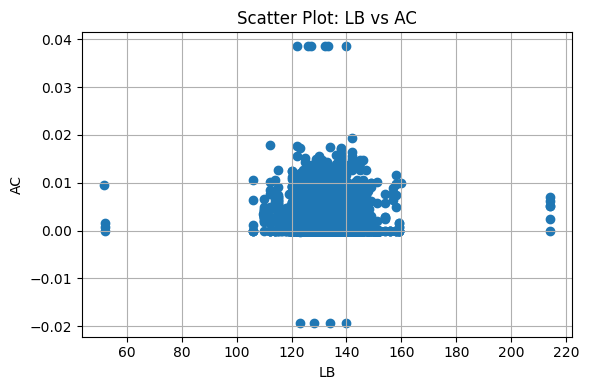

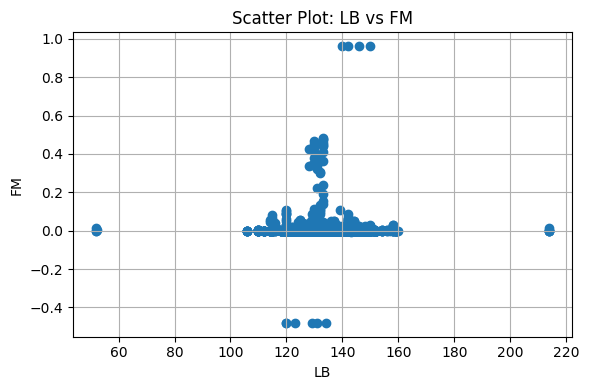

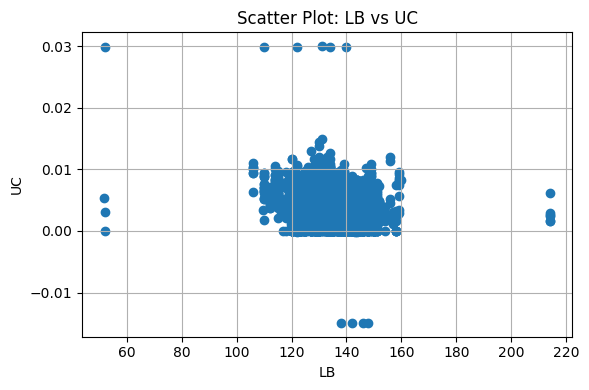

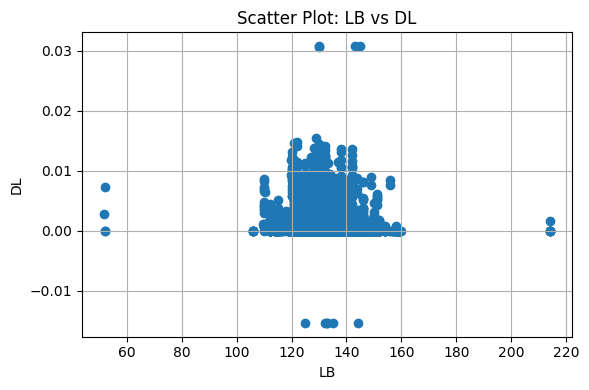

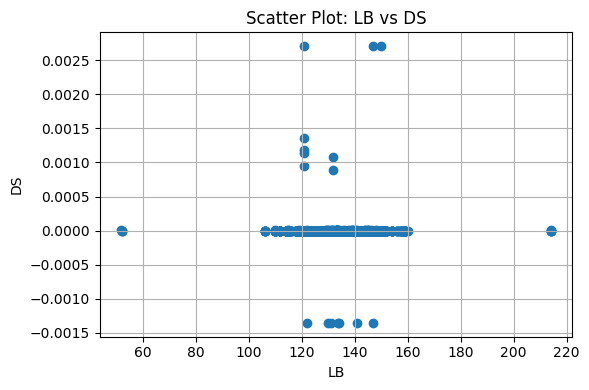

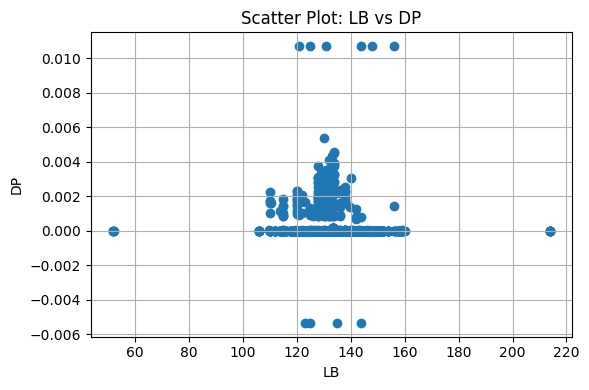

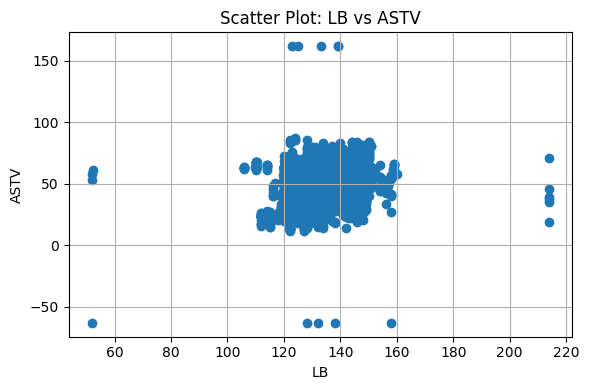

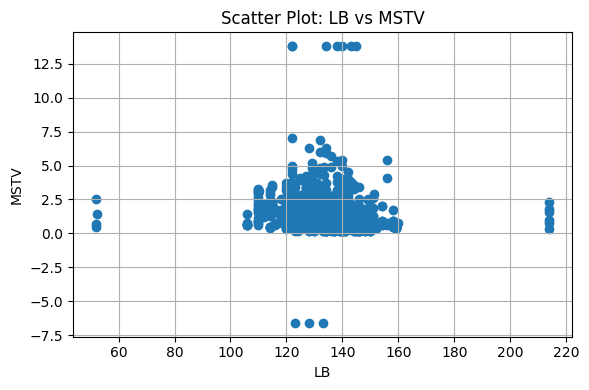

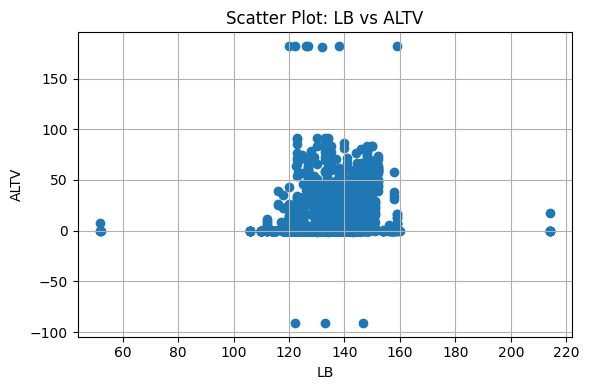

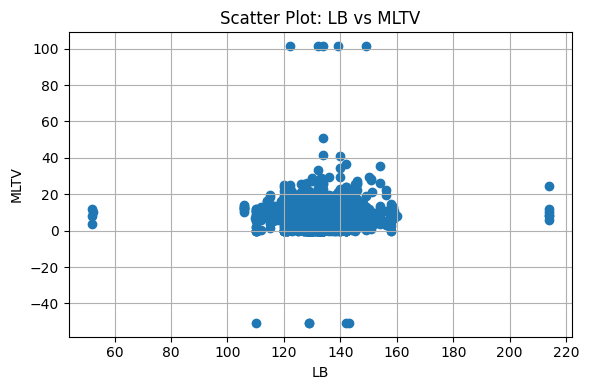

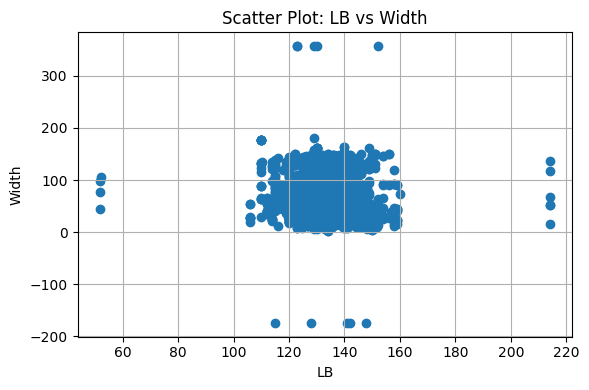

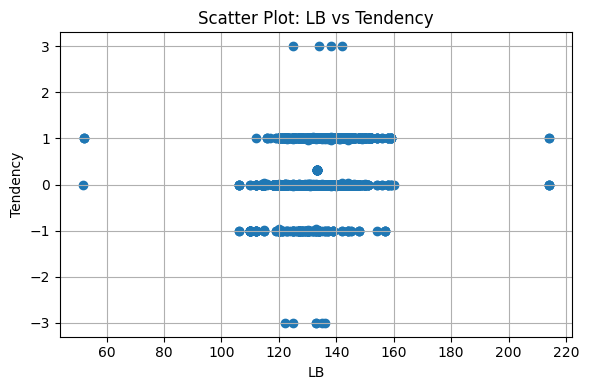

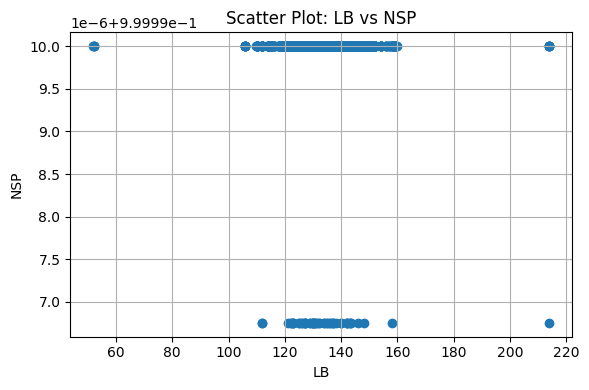

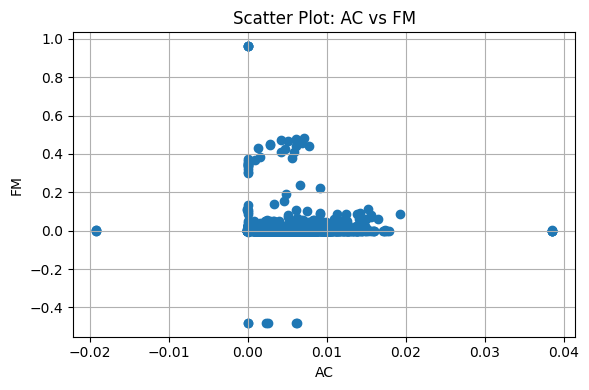

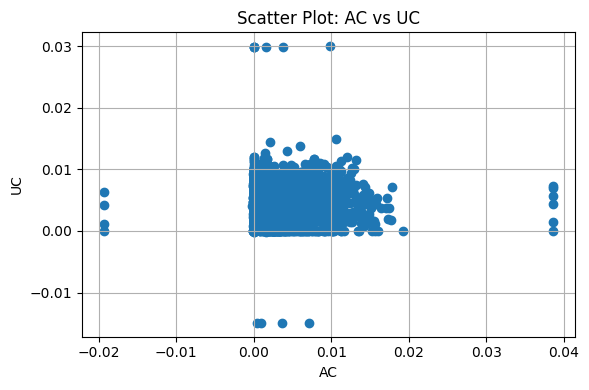

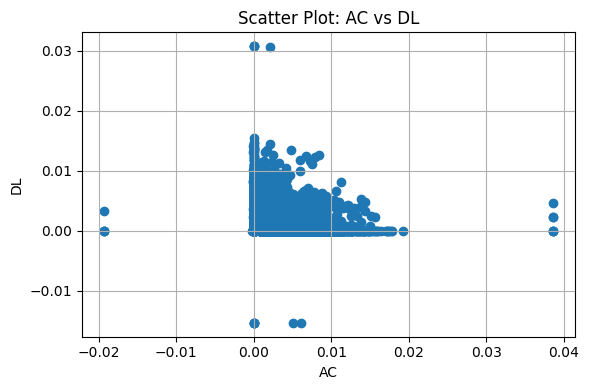

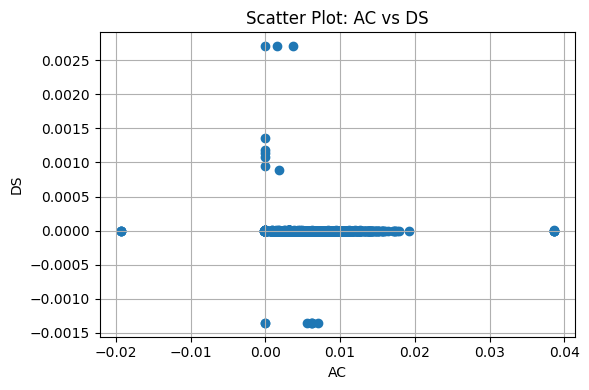

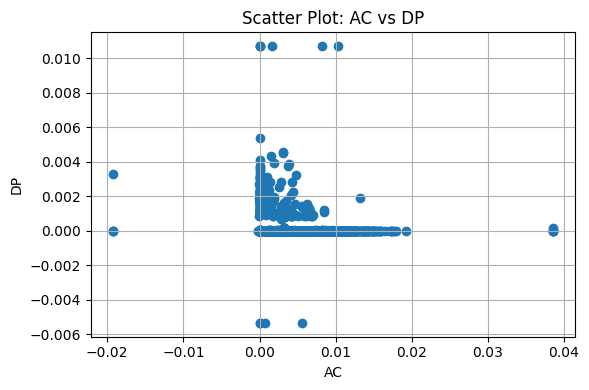

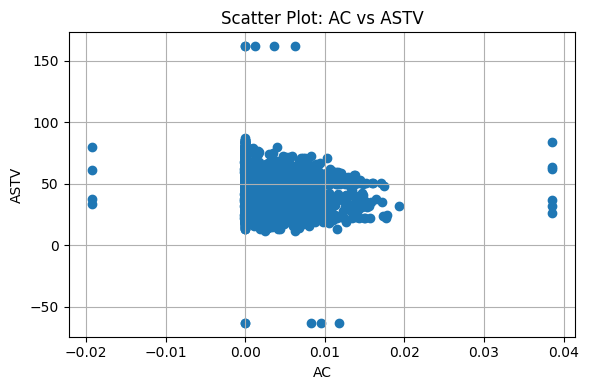

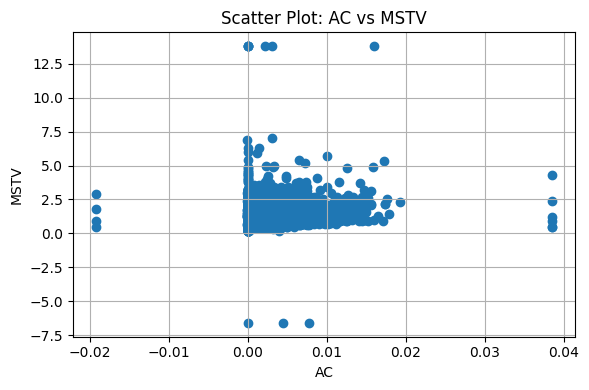

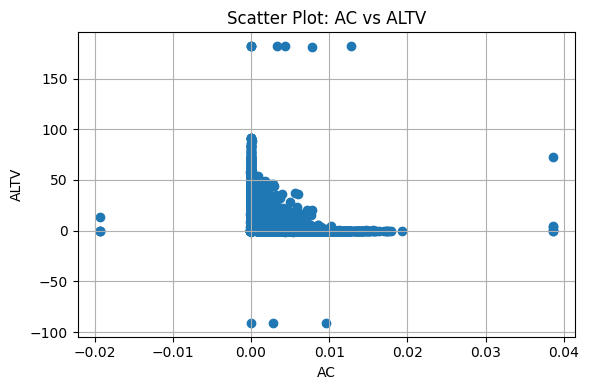

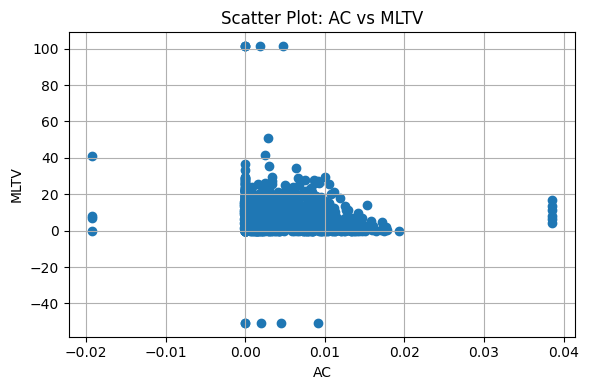

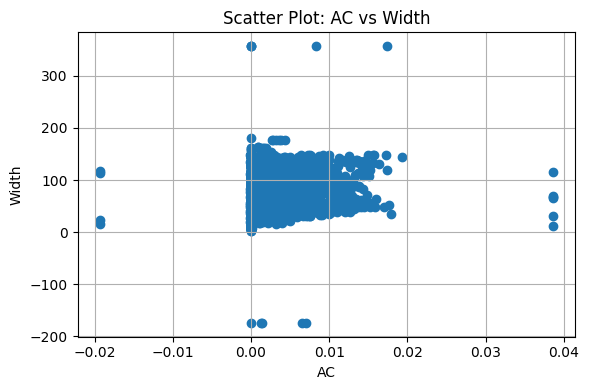

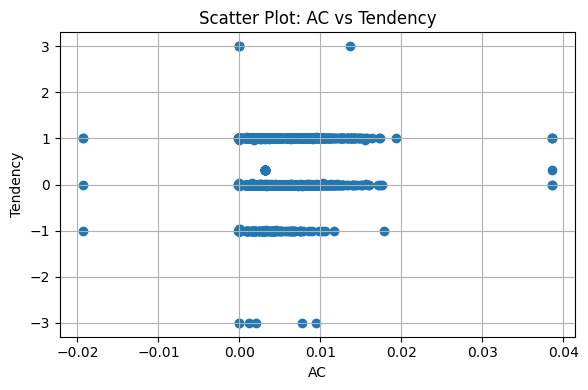

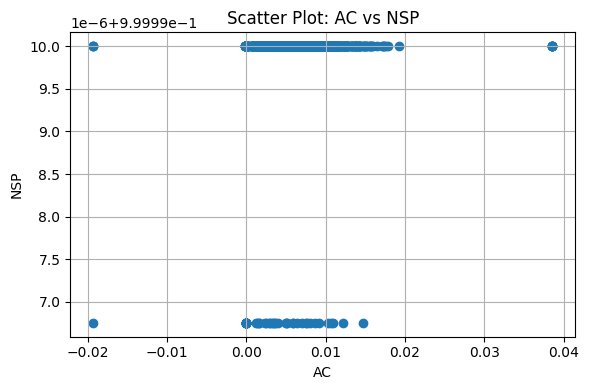

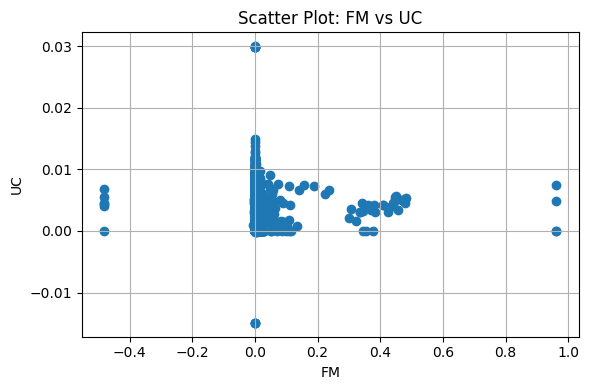

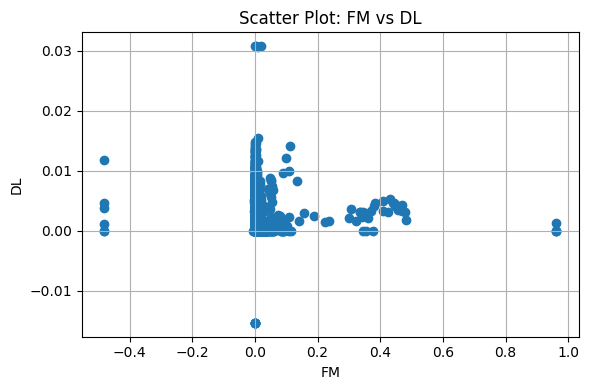

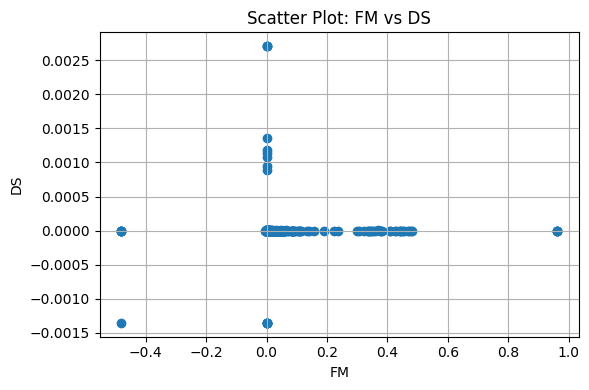

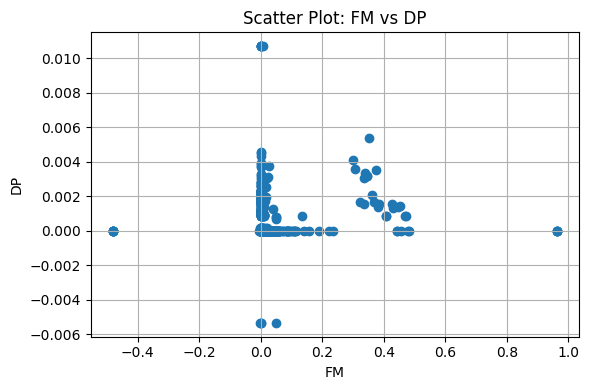

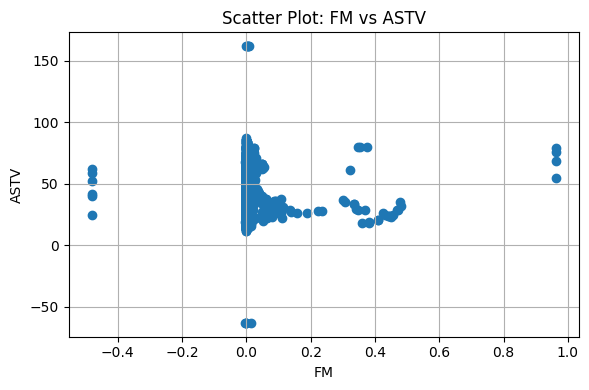

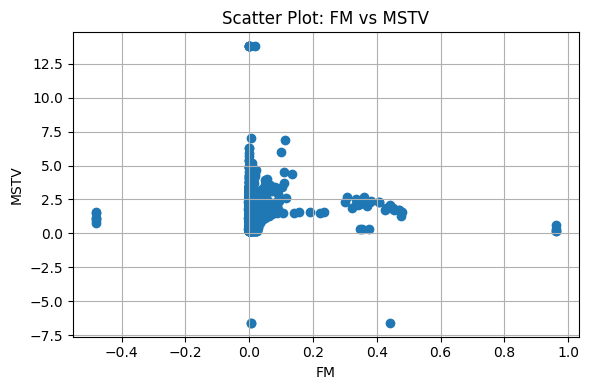

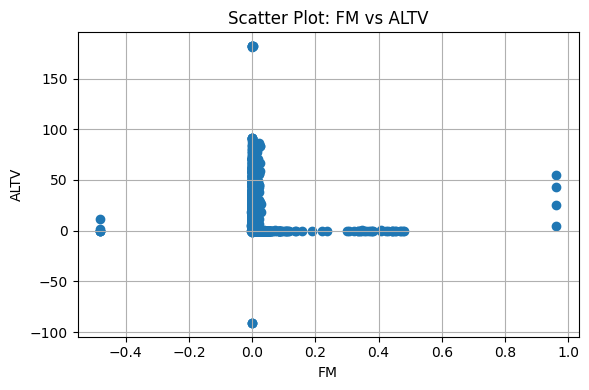

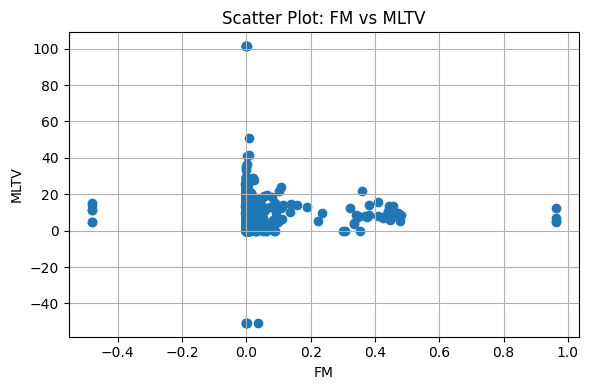

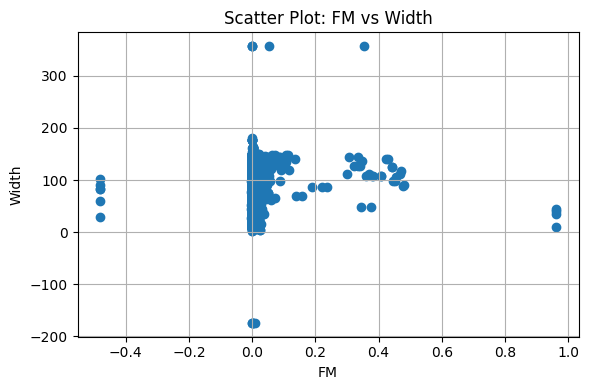

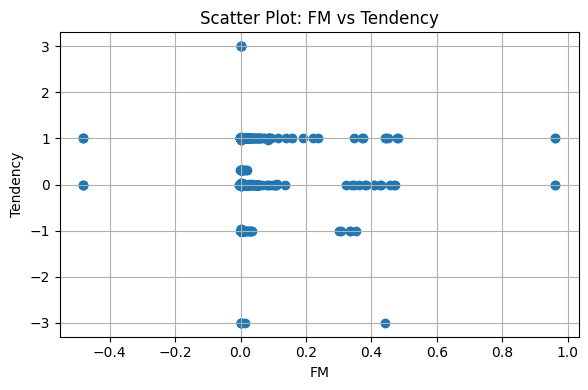

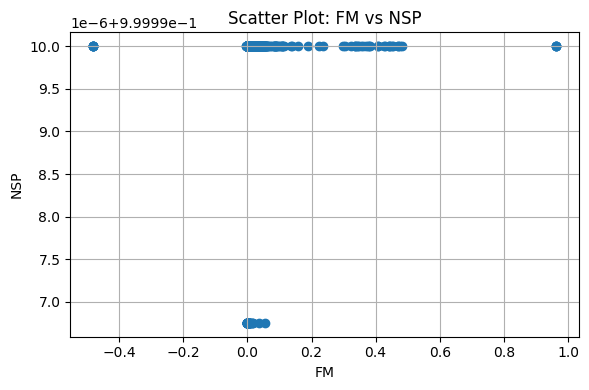

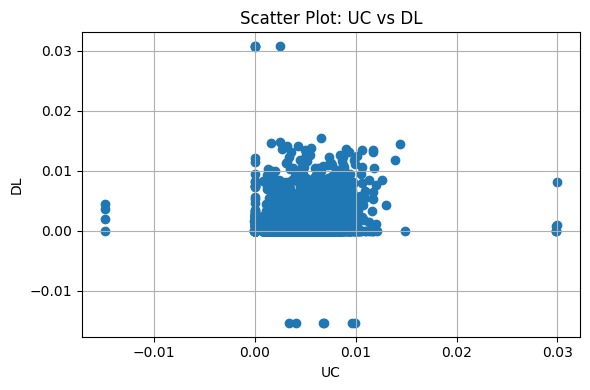

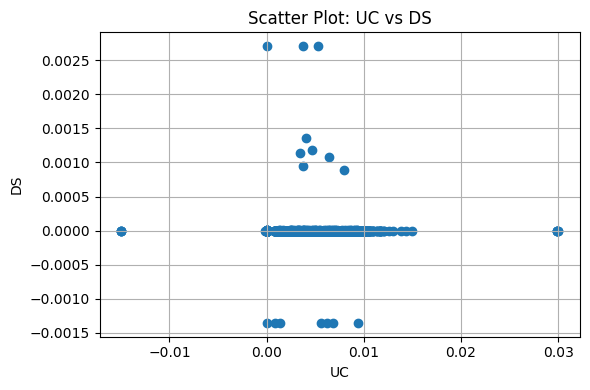

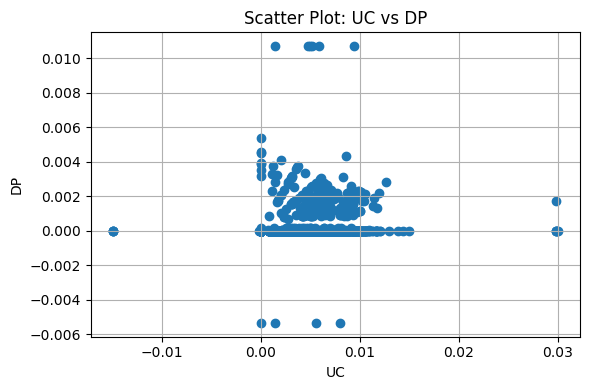

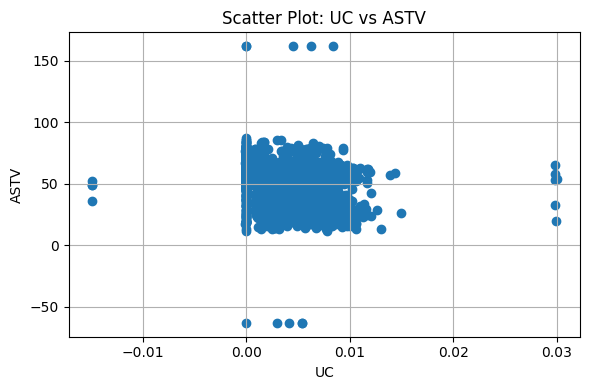

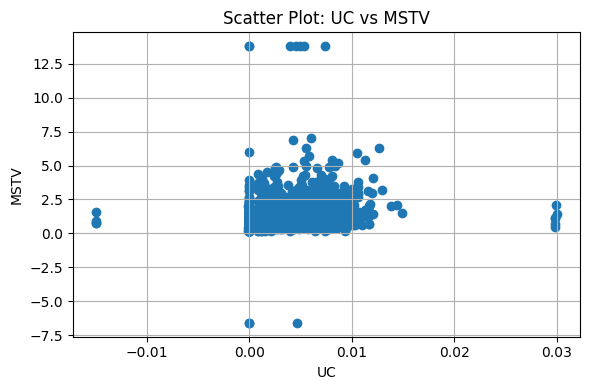

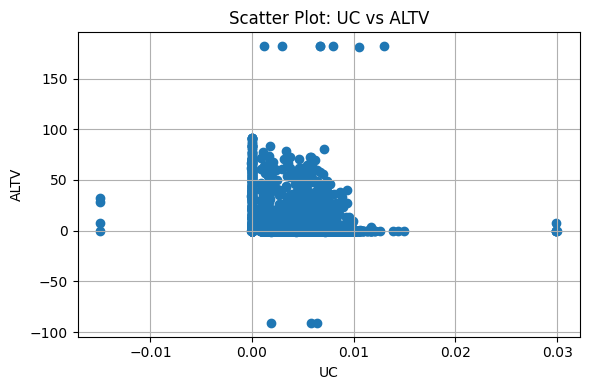

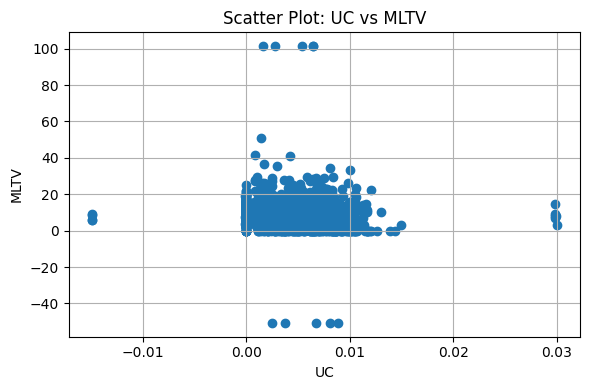

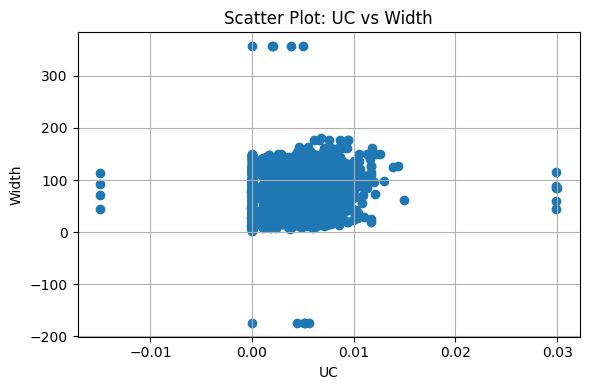

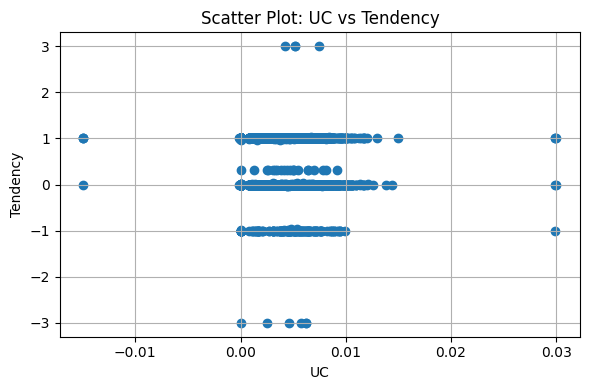

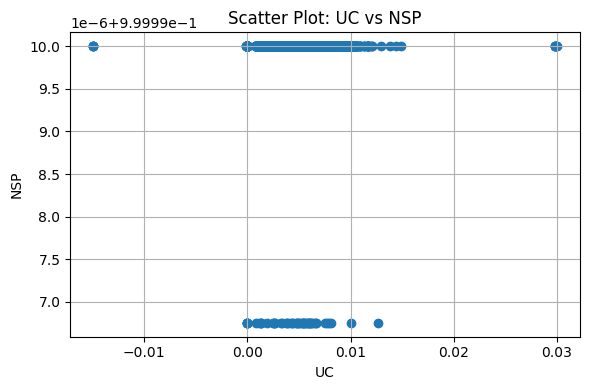

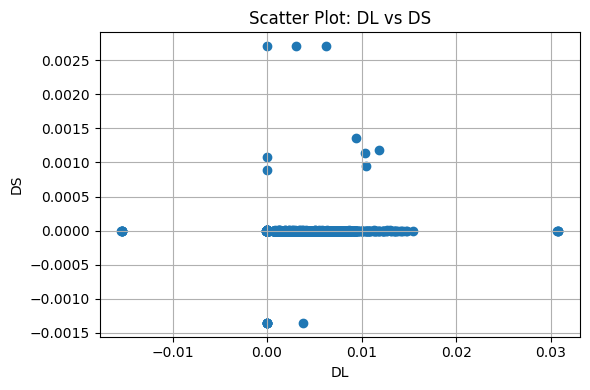

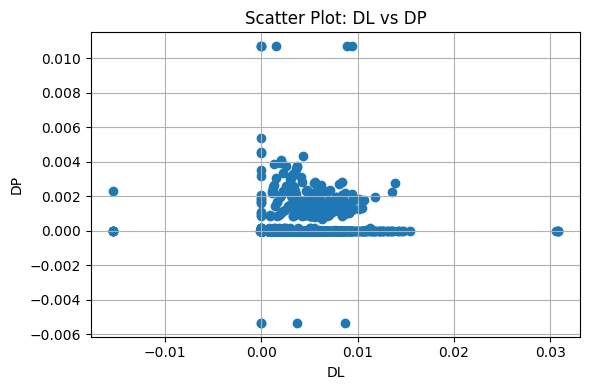

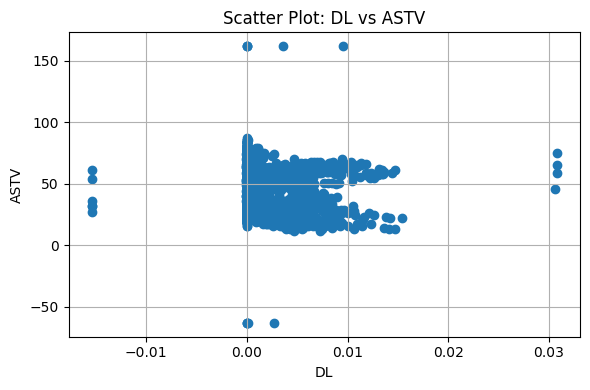

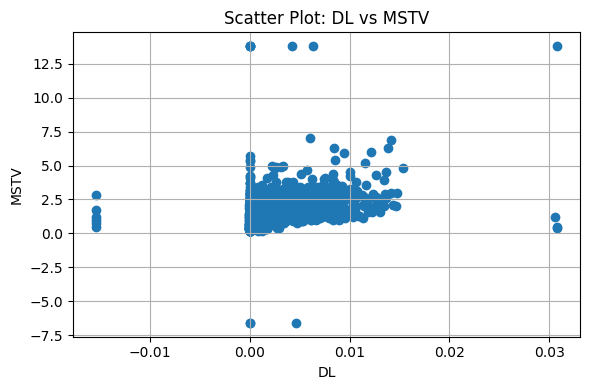

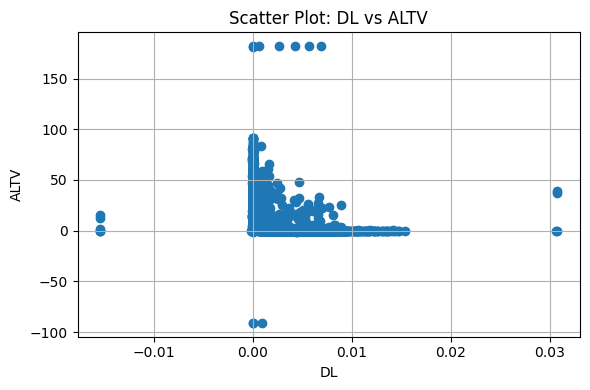

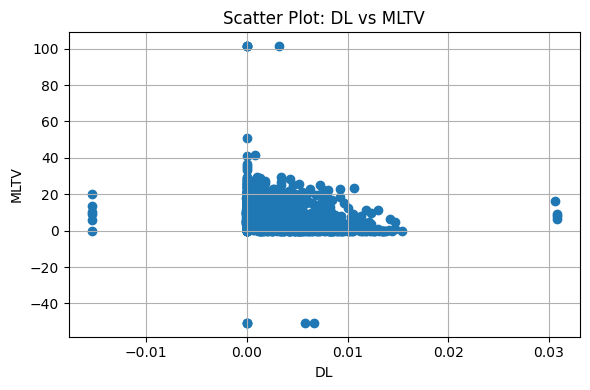

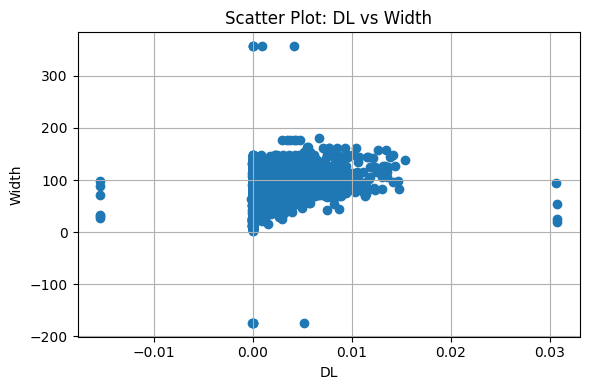

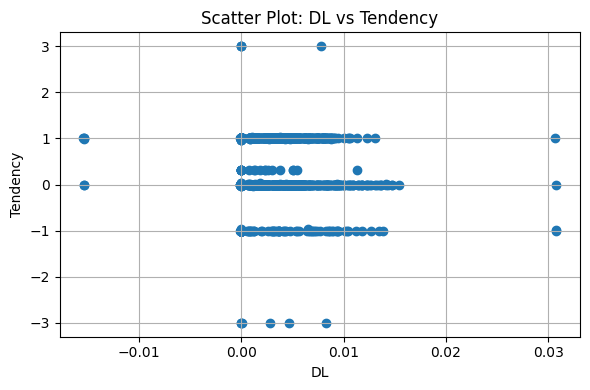

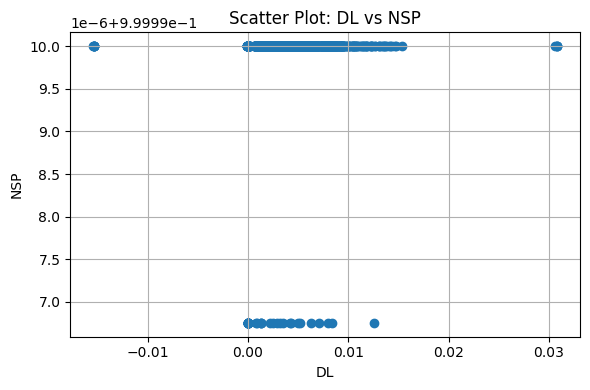

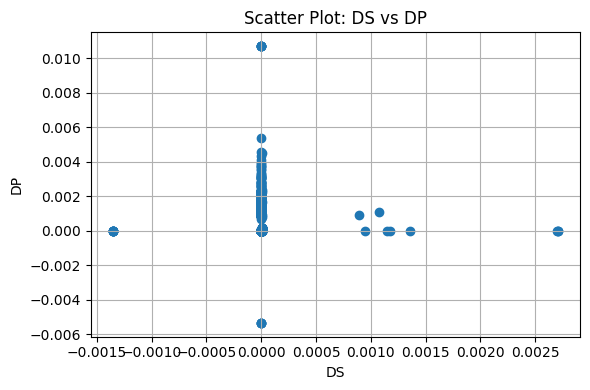

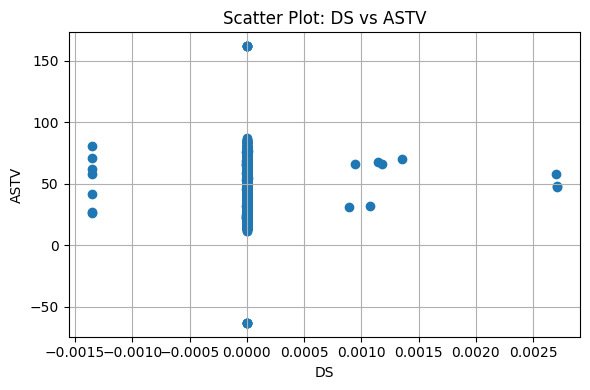

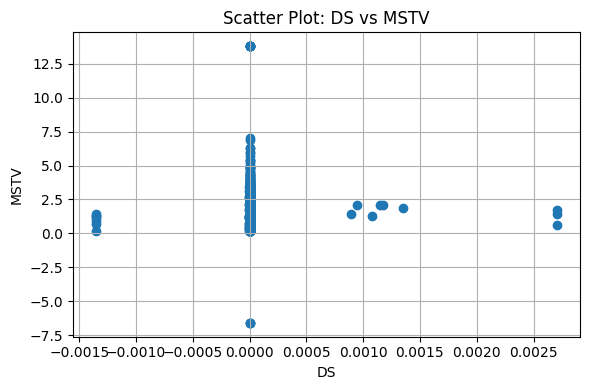

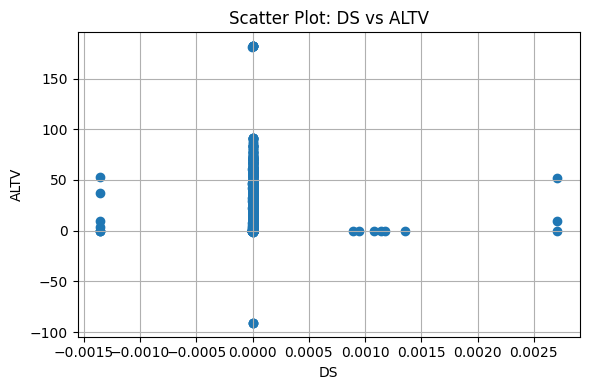

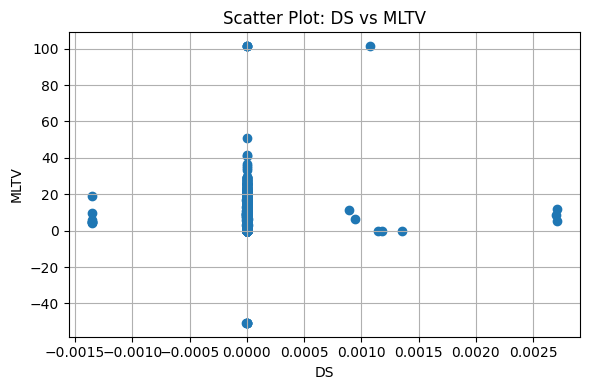

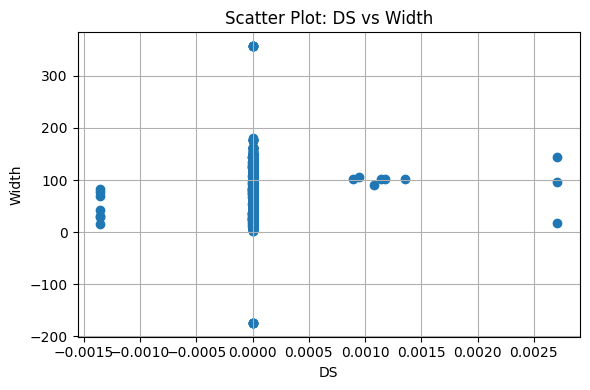

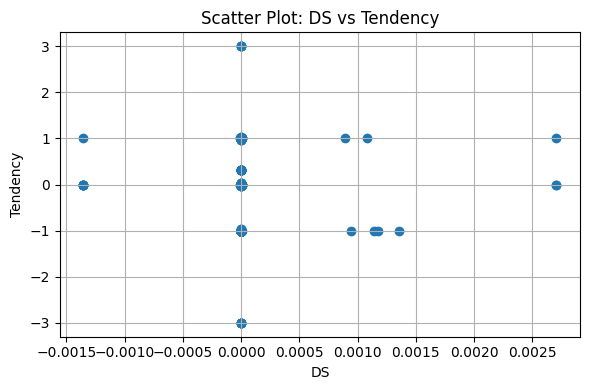

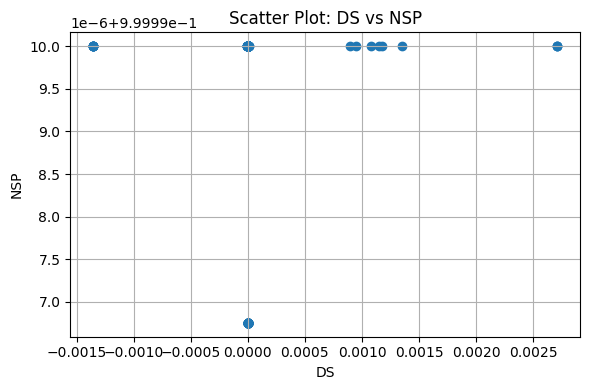

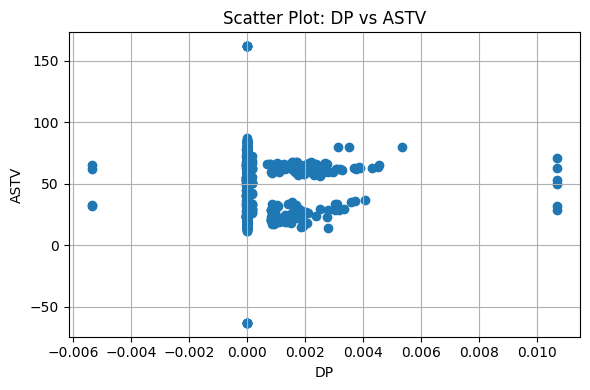

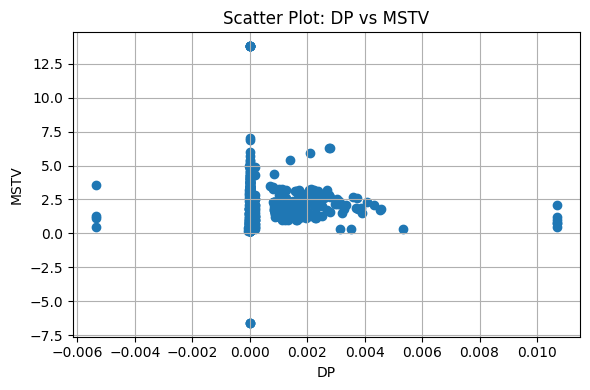

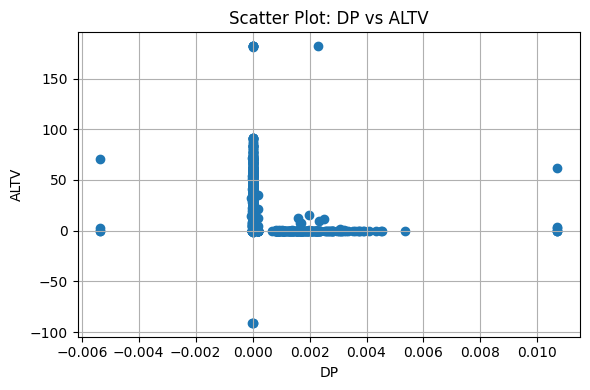

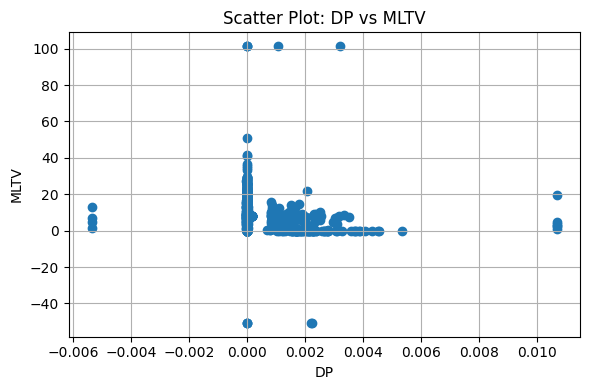

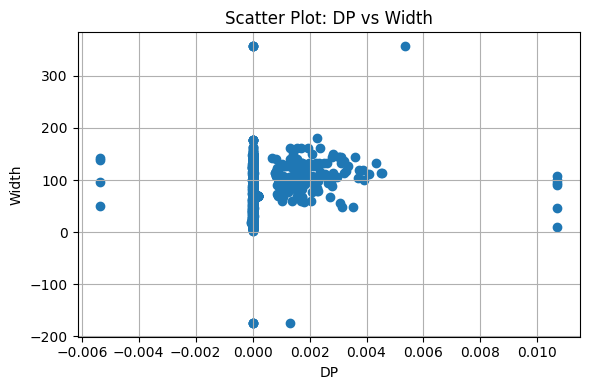

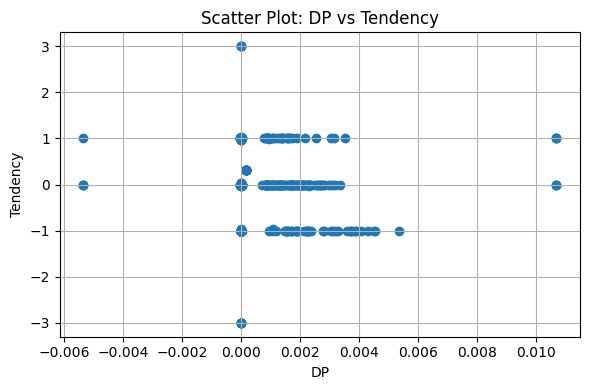

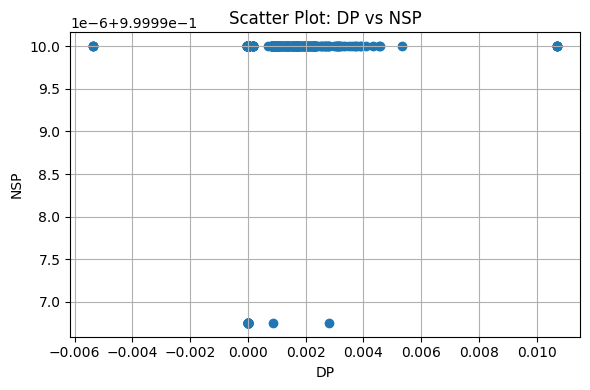

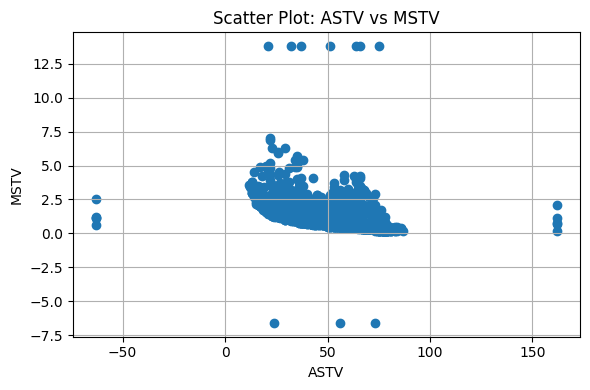

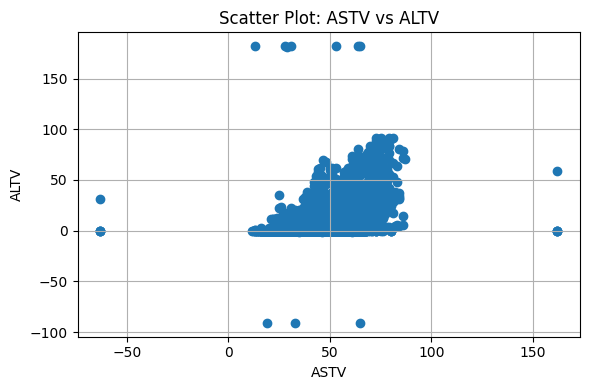

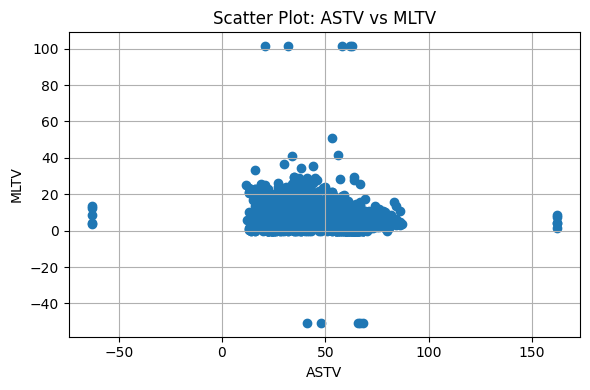

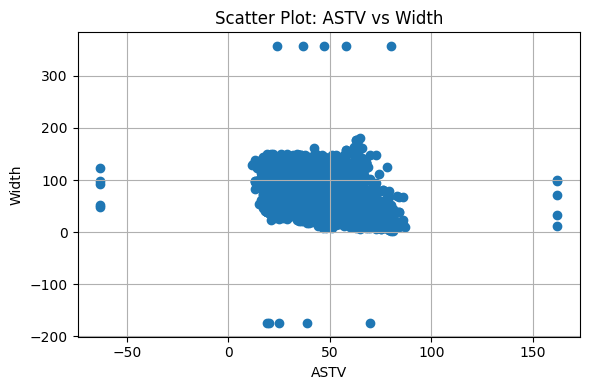

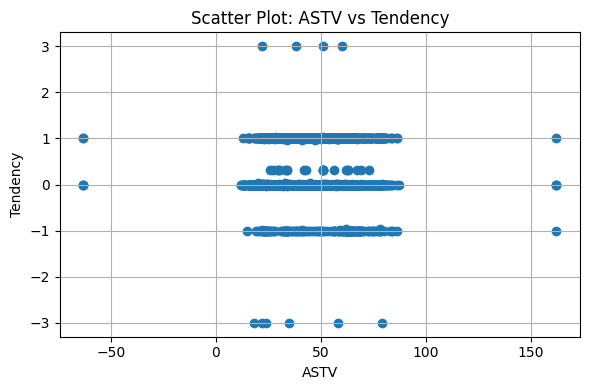

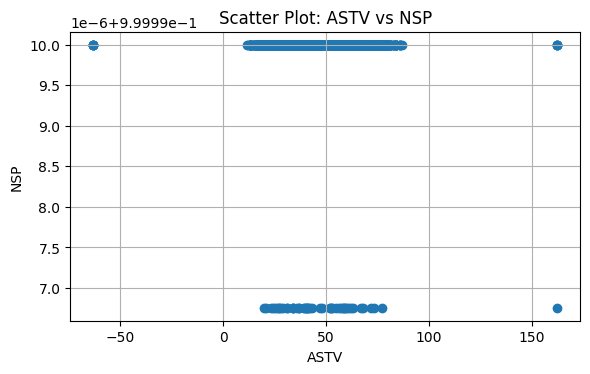

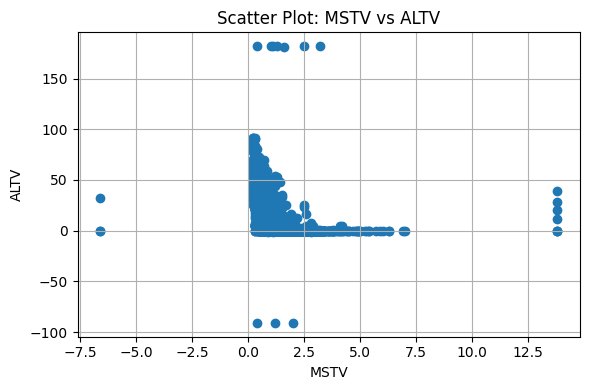

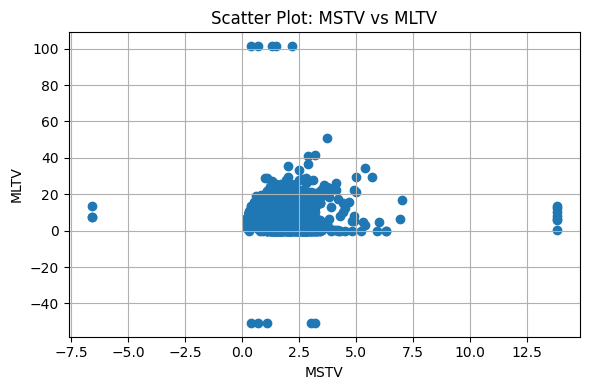

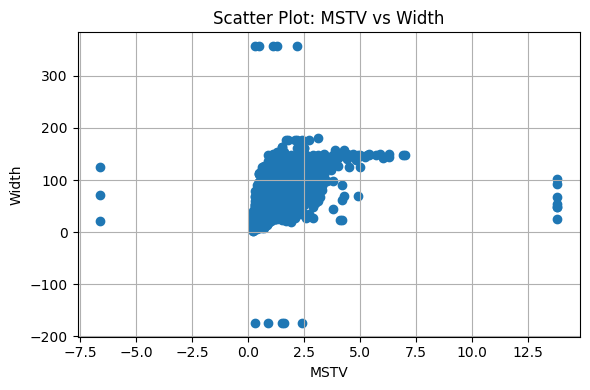

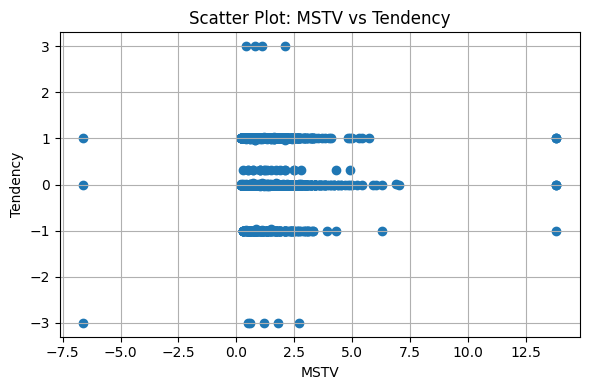

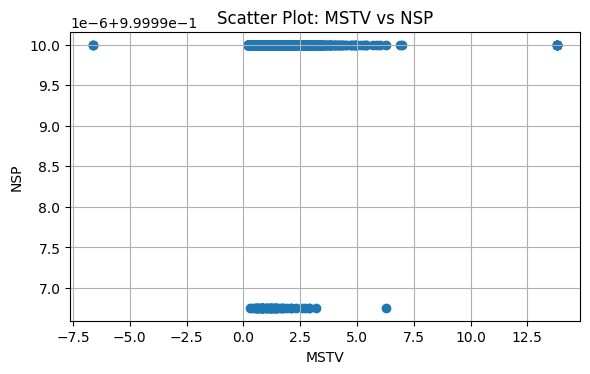

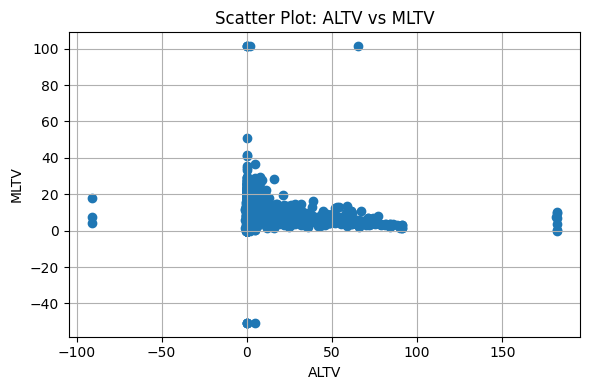

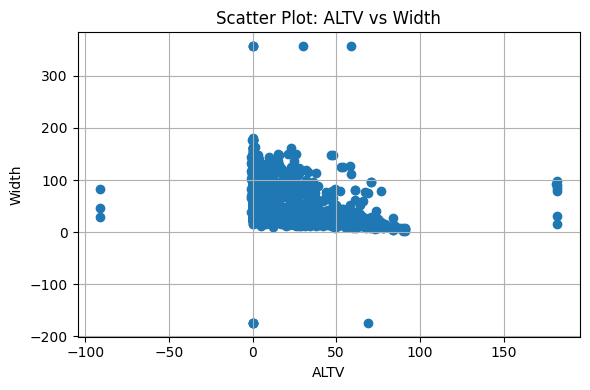

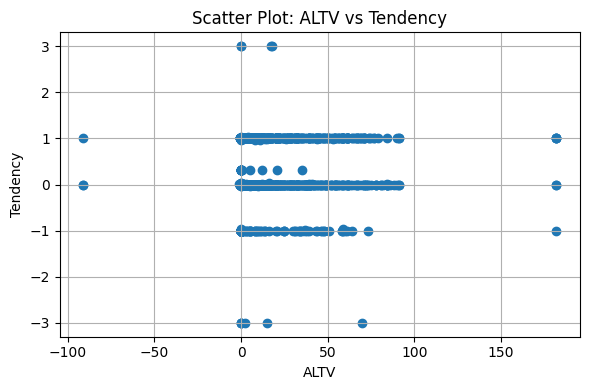

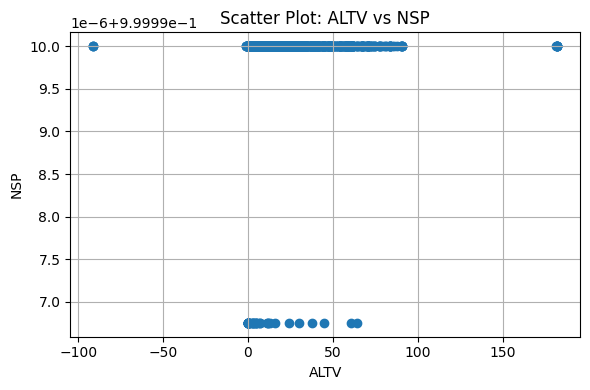

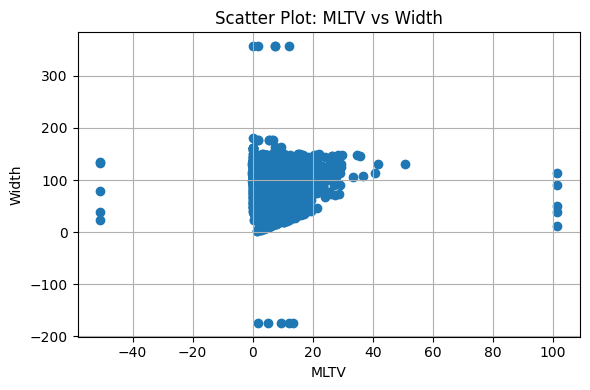

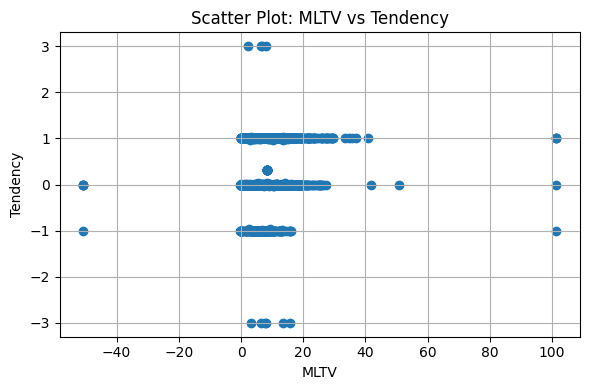

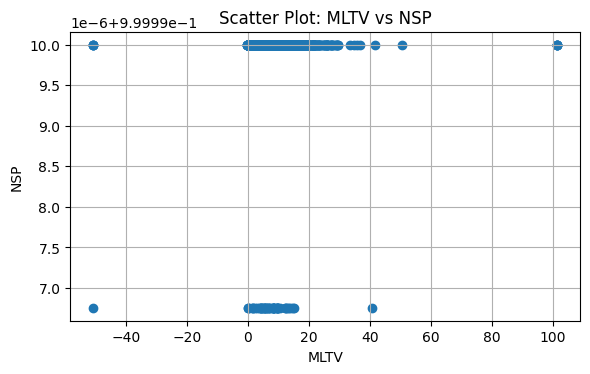

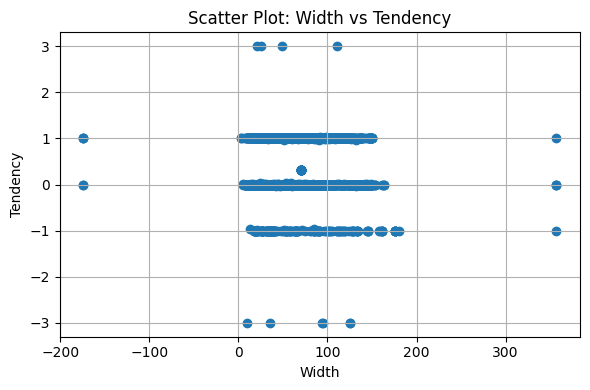

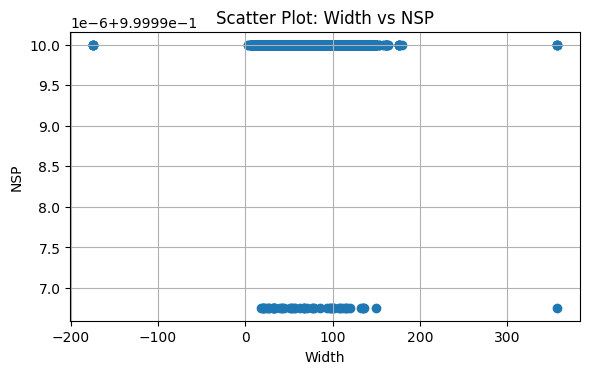

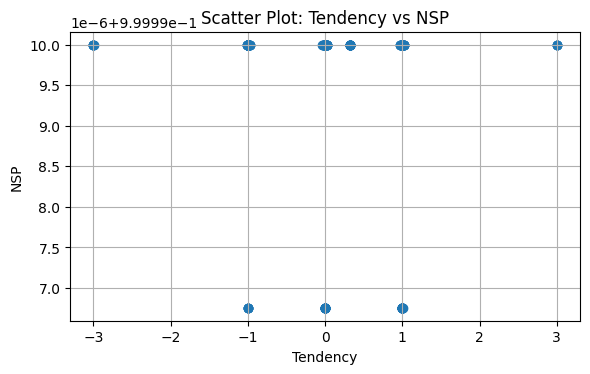

In [92]:
from itertools import combinations
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col1, col2 in combinations(numeric_cols,2):
    plt.figure(figsize=(6, 4))
    plt.scatter(x=df[col1], y=df[col2])
    plt.title(f'Scatter Plot: {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

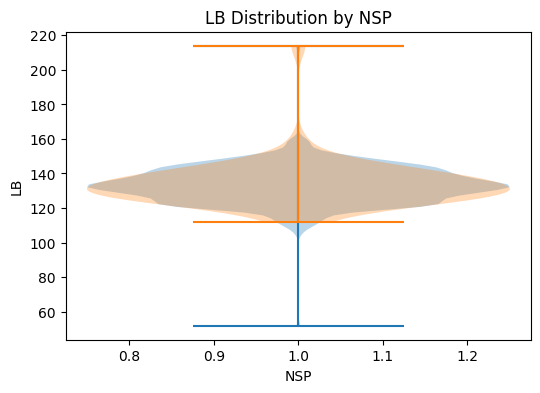

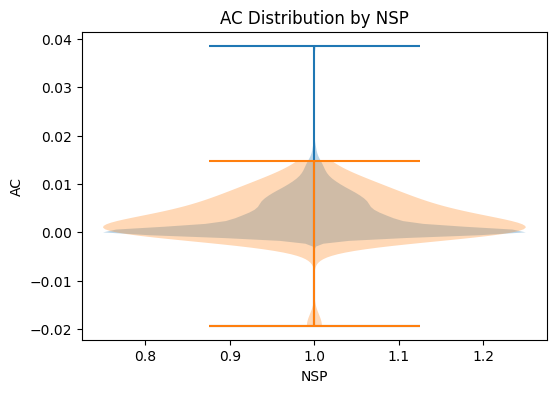

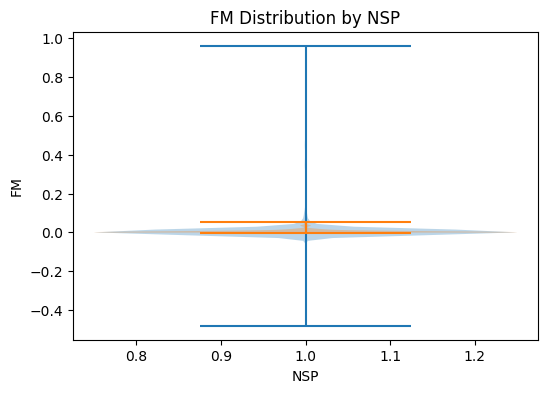

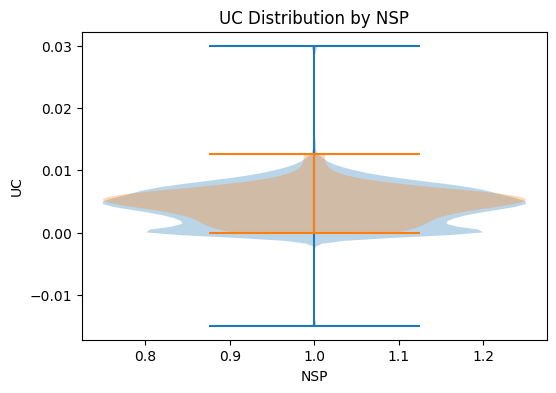

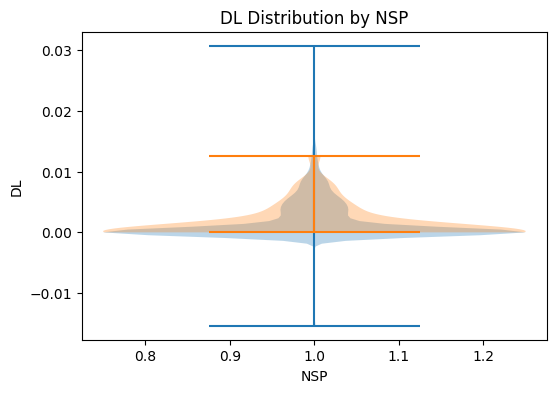

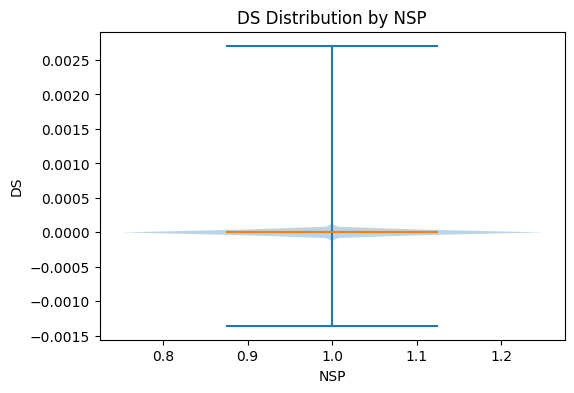

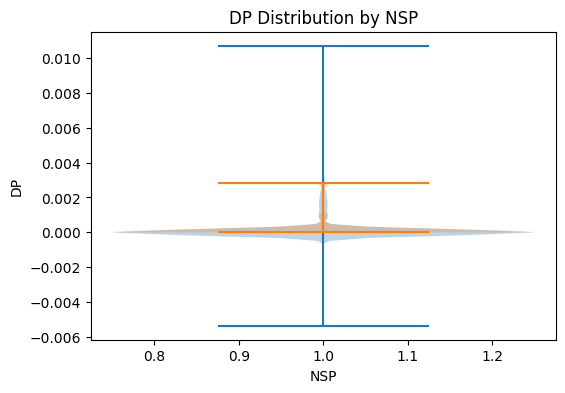

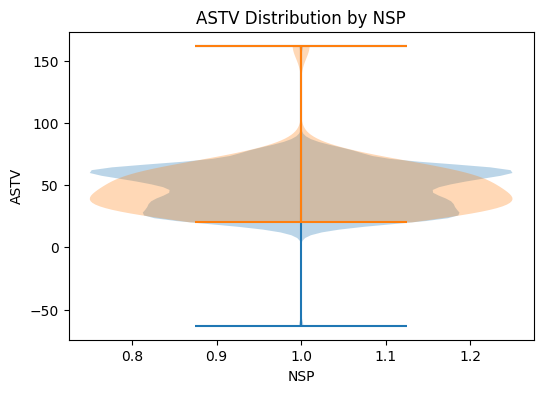

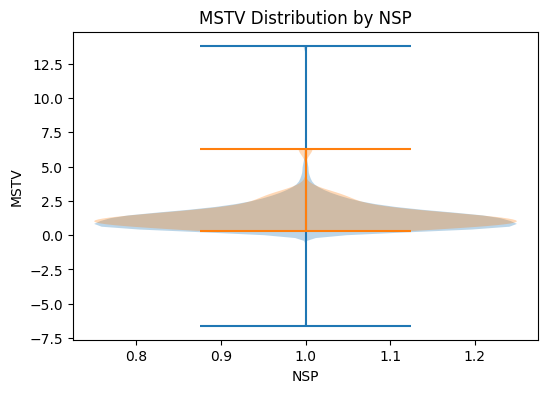

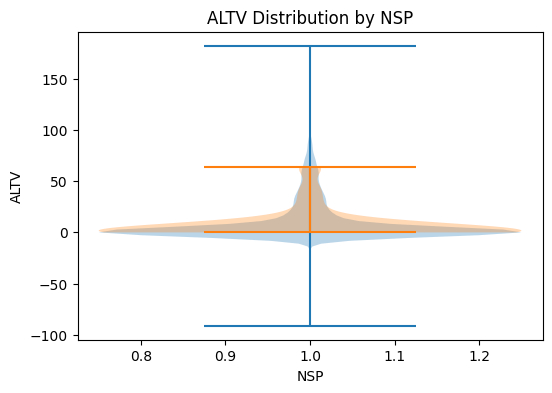

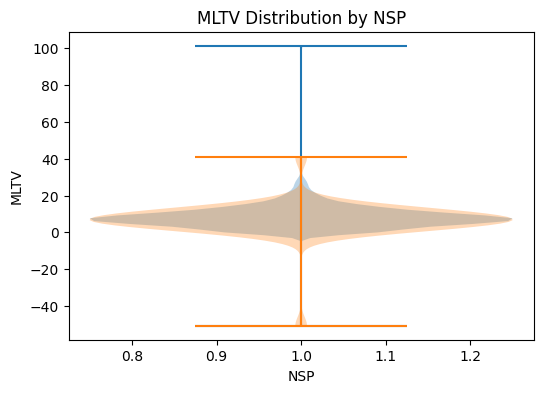

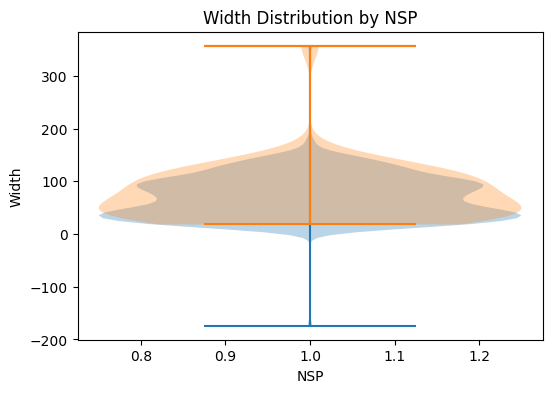

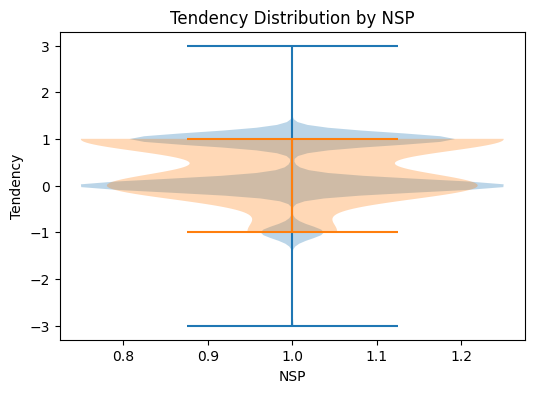

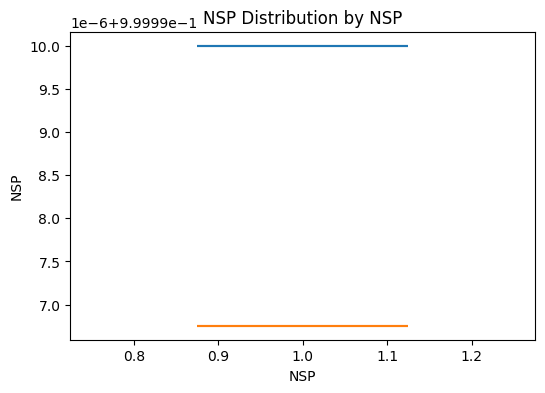

In [102]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    for label in df['NSP'].unique():
        subset = df[df['NSP'] == label][col]
        plt.violinplot(subset, positions=[label])
    plt.title(f'{col} Distribution by NSP')
    plt.xlabel('NSP')
    plt.ylabel(col)

In [104]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)



                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.062839  0.018776 -0.166201 -0.126536 -0.005438   
AC       -0.062839  1.000000  0.009432  0.071863 -0.093196 -0.033101   
FM        0.018776  0.009432  1.000000 -0.053226  0.009718  0.029899   
UC       -0.166201  0.071863 -0.053226  1.000000  0.190128 -0.006922   
DL       -0.126536 -0.093196  0.009718  0.190128  1.000000  0.058430   
DS       -0.005438 -0.033101  0.029899 -0.006922  0.058430  1.000000   
DP       -0.047724 -0.083277  0.121274  0.070501  0.144940  0.004285   
ASTV      0.241857 -0.230439 -0.032691 -0.181161 -0.069361  0.008425   
MSTV     -0.169561  0.133649  0.017055  0.189406  0.410102  0.016077   
ALTV      0.210446 -0.271041 -0.011936 -0.227304 -0.186967 -0.004392   
MLTV     -0.003457 -0.104875 -0.006237 -0.049351 -0.165198  0.034349   
Width    -0.118425  0.234735  0.097204  0.107159  0.408664  0.040832   
Tendency  0.236864  0.031977 -0.018338 -0.066463 -0.023490 -0.01

In [106]:
"""ASTV vs. ALTV: These are often inversely related. A high ASTV (short-term variability) and low ALTV (long-term variability) may indicate normal fetal health.

LB (Baseline FHR) vs. UC (Uterine Contractions): A weak or moderate correlation might suggest how fetal heart rate responds to contractions.

Width vs. MLTV: If these are strongly correlated, it could indicate that broader signal width is associated with more long-term variability.

NSP vs. other features: If NSP is your target (e.g., Normal, Suspect, Pathologic), features with high correlation to NSP could be strong predictors for classification models."""

'ASTV vs. ALTV: These are often inversely related. A high ASTV (short-term variability) and low ALTV (long-term variability) may indicate normal fetal health.\n\nLB (Baseline FHR) vs. UC (Uterine Contractions): A weak or moderate correlation might suggest how fetal heart rate responds to contractions.\n\nWidth vs. MLTV: If these are strongly correlated, it could indicate that broader signal width is associated with more long-term variability.\n\nNSP vs. other features: If NSP is your target (e.g., Normal, Suspect, Pathologic), features with high correlation to NSP could be strong predictors for classification models.'

In [108]:
"""Fluctuations in FHR (LB): Sudden drops or spikes may indicate fetal stress.

Variability Patterns (ASTV, MSTV): Low variability over time can be a warning sign.

Contraction Frequency (UC): Increasing frequency or intensity may correlate with labor progression.

NSP Changes: If NSP is time-dependent, track how physiological signals change before a classification shift"""

'Fluctuations in FHR (LB): Sudden drops or spikes may indicate fetal stress.\n\nVariability Patterns (ASTV, MSTV): Low variability over time can be a warning sign.\n\nContraction Frequency (UC): Increasing frequency or intensity may correlate with labor progression.\n\nNSP Changes: If NSP is time-dependent, track how physiological signals change before a classification shift'

In [110]:
"""Statistical Highlights
Skewed Distributions: Several features such as FM, DL, DP, DS, and ALTV have medians of 0, indicating sparse or zero-heavy distributions. These may benefit from transformation or binarization.

High Variability: Features like Width, ASTV, and ALTV show large standard deviations and interquartile ranges, suggesting wide data spread and potential outliers.

Constant Feature: NSP has a mean and median of 1.0 with negligible standard deviation, implying it's likely a label or a constant feature in this subset.

 Correlation Patterns
Strong Correlations: Features such as ASTV and ALTV may show inverse relationships, which are clinically relevant in fetal health monitoring.

Multicollinearity Risk: Some features may be highly correlated (e.g., MLTV and Width), which could affect model performance and require dimensionality reduction.

 Temporal Trends (if time data is present)
If a time column exists, plotting features like LB, UC, and ASTV over time may reveal:

Fluctuations in fetal heart rate (LB)

Increasing contraction frequency (UC)

Variability changes (ASTV, MSTV) that could signal fetal distress or labor progression"""

"Statistical Highlights\nSkewed Distributions: Several features such as FM, DL, DP, DS, and ALTV have medians of 0, indicating sparse or zero-heavy distributions. These may benefit from transformation or binarization.\n\nHigh Variability: Features like Width, ASTV, and ALTV show large standard deviations and interquartile ranges, suggesting wide data spread and potential outliers.\n\nConstant Feature: NSP has a mean and median of 1.0 with negligible standard deviation, implying it's likely a label or a constant feature in this subset.\n\n Correlation Patterns\nStrong Correlations: Features such as ASTV and ALTV may show inverse relationships, which are clinically relevant in fetal health monitoring.\n\nMulticollinearity Risk: Some features may be highly correlated (e.g., MLTV and Width), which could affect model performance and require dimensionality reduction.\n\n Temporal Trends (if time data is present)\nIf a time column exists, plotting features like LB, UC, and ASTV over time may 